# Proejct 1: Edge Detection/Hough Transform

### What to Submit
Submit this iPython Notebook--containing all your code for the programming exercises below--on [learning suite](https://learningsuite.byu.edu/).

Your notebook file should produce the relevant plots and also provide a short write-up with answers to the questions in parts A-B.

Please also fill in here the time that each part took you:
* A1. Gradient Magnitude: <span style="color:red;">FILL IN TIME</span>
* A2. Gradient Orientation: <span style="color:red;">FILL IN TIME</span>
* A3. Laplacian Zero-crossings: <span style="color:red;">FILL IN TIME</span>
* A4. Gradient Magnitude + Zero-crossings: <span style="color:red;">FILL IN TIME</span>
* B. Hough Transform (Circles):  <span style="color:red;">FILL IN TIME</span>

Note that the images referred to and needed for this project are contained in the zip file provided (in the same directory as this notebook file).  <i>Please use the files as though they are in the same directory.  We will drop your notebook file into our folder and run it.</i>

### Programming Exercises
Make sure to read through all of the assignment and plan accordingly.  The first part is relatively easy, but you should allow adequate time for the second part.

The main goal is to investigate edge detection and the Hough transform as discussed in Sections 4.2 and 4.3 of [Szeliski](http://szeliski.org/Book "Computer Vision: Algorithms and Applications").

#### Part A: Edge Detection (32 points)
For each of the following four parts, try out your code first on the <span style="color:orange;">2D_White_Box.png</span> image, then on the more complicated <span style="color:orange;">blocks.png</span> image.

Note: Many of the images will contain negative numbers or numbers larger than 255.  Make sure you approprately scale the output images to display all of the information.  Hint: try mapping negative values to [0,128) and positive values to (128,255].

2D_White_Box.png:
![alt 2D_White_Box.png](2D_White_Box.png)

blocks.png:
![alt blocks.png](blocks.png)

<br><br><b>A1. Gradient Magnitude</b> - Compute the gradient magnitude image for a grayscale image.  Apply a suitable threshold to find edge points--play with the threshold to find the "best" solution.  How well does this seem to work?  Feel free to use any preprocessing you wish to prior to edge detection.

In [281]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm  # notebook compatible
plt.rcParams['figure.figsize'] = [15,8]
plt.rcParams['axes.titlesize'] = '16'
plt.rcParams['axes.titleweight'] = 'bold'

import cv2
def just_title(title):
    a = plt.gca()
    a.set_title(title, fontdict={'fontsize': rcParams['axes.titlesize'],
                                 'fontweight' : rcParams['axes.titleweight'],
                                 'verticalalignment': 'baseline',
                                 'horizontalalignment': 'center'})
    a.set_xticks([])
    a.set_yticks([])
    
def color2gray(image):
    
    result = image[:, :, 0] * 0.299 + image[:, :, 1] * 0.587 + image[:, :, 2] * 0.114

    return result

from scipy import misc

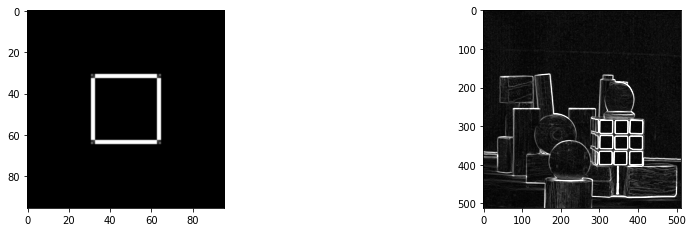

In [21]:
# Part 1. Compute the Gradient Magnitude

# construct the Sobel x-axis kernel
sobelX = np.array((
        [-1, 0, 1],
        [-2, 0, 2],
        [-1, 0, 1]), dtype="int")
# construct the Sobel y-axis kernel
sobelY = np.array((
        [-1, -2, -1],
        [0, 0, 0],
        [1, 2, 1]), dtype="int")
    
def map_to_uint8(image):
    # take the Sobel kernel and make sure that 
    abs_sobel64f = np.absolute(image)
    sobel_8u = np.uint8(abs_sobel64f)
    return sobel_8u

def rescale(image):
    return (image +1)*255/2

def get_gradients(img):
    convolved_Y = map_to_uint8(cv2.filter2D(img, cv2.CV_64F, sobelY))
    convolved_X = map_to_uint8(cv2.filter2D(img, cv2.CV_64F, sobelX))
    return convolved_X, convolved_Y

def get_gradient_magnitude(img):
    convolved_X = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)
    convolved_Y = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3)

#     convolved_X, convolved_Y = get_gradients(img)
    magnitude = np.sqrt(np.square(convolved_X) + np.square(convolved_Y)).astype(np.float64)
    return magnitude #(magnitude).astype(np.uint8)


# laplacian = cv2.Laplacian(img,cv2.CV_64F)

plt.subplot(221)
white_box = color2gray(cv2.imread('2D_White_Box.png'))
plt.imshow((get_gradient_magnitude(white_box)).astype(np.uint8),cmap="gray")

plt.subplot(222)
blocks = color2gray(cv2.imread('blocks.png'))
plt.imshow(get_gradient_magnitude(blocks).astype(np.float32),cmap="gray", vmin=0, vmax=255)
# Show your results on the blocks image

<br><b>A2. Gradient Orientation</b> - Compute a gradient orientation image for a grayscale image.  Encode the orientations as intensity using any method you wish. (Just make sure to document it.)  Hint: use atan2(), not atan(), to do the angle calculation.

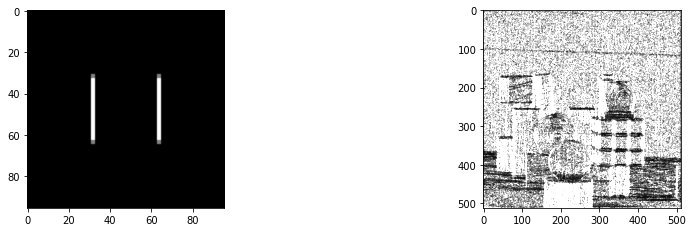

In [350]:
# Part 2. Compute the Gradient Orientation

def get_orientation(img):
    convolved_X, convolved_Y = get_gradients(img)
    return np.arctan2(convolved_X,convolved_Y).astype(float)

plt.subplot(221)
plt.imshow(get_orientation(white_box),cmap="gray")

plt.subplot(222)
plt.imshow(get_orientation(blocks),cmap="gray", clim=(0,1))

# Show your results on the blocks image


<br><b>A3. Laplacian Zero-Crossings</b> - Apply a 3x3 Laplacian kernel to blocks and find the zero crossings.



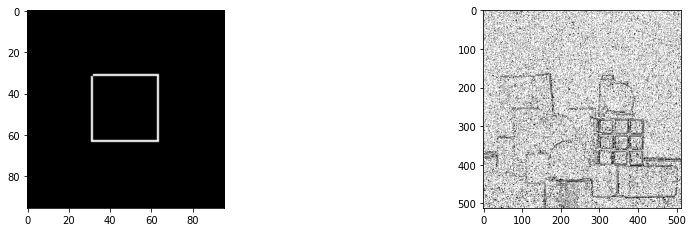

In [96]:
# Part 3. Find the Zero Crossings
laplacian = np.array([[0, 1, 0],
                  [1, -4, 1],
                  [0, 1, 0]])


def zero_find(img):
    blurred = (img[:-1] * img[1:]) < 0
    straight_blur = blurred.reshape(-1)
    blurred = np.append(straight_blur, blurred[-1, :].reshape(-1)).reshape(img.shape[0], -1)
    return blurred

def zero_crossings(img):
    blurred = cv2.filter2D(img, cv2.CV_64F, laplacian)
    found_x = zero_find(blurred)
    found_y = zero_find(np.rot90(blurred, axes=(1,0)))
    found_y = np.rot90(found_y, axes=(0, 1))
    found_all = found_x + found_y
    return found_all
    

    
# Show the results on blocks image
plt.subplot(221)
box_zcr = zero_crossings(white_box)
plt.imshow(box_zcr,cmap="gray")

plt.subplot(222)
blocks_zcr = zero_crossings(blocks)
plt.imshow(blocks_zcr,cmap="gray")


<br><b>A4. Combine Gradient Magnitude and Zero-Crossings</b> - Use the gradient magnitude image computed in item 1 to select Laplacian zero-crossings in part 3 that correspond to points with gradients higher than some threshold that you determine.  Adjust your threshold to find the best solution.


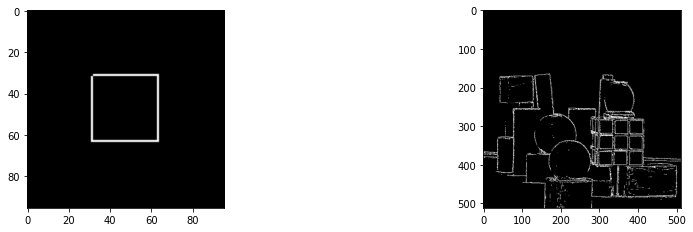

In [102]:
# Part 4. Final Solution

def get_edges(img, threshold=20):
    magnitude = get_gradient_magnitude(img) > threshold
    zero_crossing = zero_crossings(img)
    together = zero_crossing & magnitude
    return together

plt.subplot(221)
plt.imshow(get_edges(white_box, threshold=80),cmap="gray", clim=(0, 1))

plt.subplot(222)
plt.imshow(get_edges(blocks, threshold=80),cmap="gray")


##### Part A: Write-up

<span style="color:red">Please describe your results here and any questions, etc. above.</span>



<br><br><br>
#### Part B: Hough Transform (68 points)
Use the Hough transform to find all of the circular shapes in a color image.  They occur in three (approximate) sizes: 32, 64, and 96 pixels in diameter.  Try it out first on the simple <span style="color:orange;">simplecircle.png</span> image, then on the more complicated <span style="color:orange;">circles.png</span> image.

After finding maxima in the accumulator(s), write out a list of positions and sizes (small, medium, or large) for each circle.  Be aware that for some of the circles the center is outside the image--you should still be able to identify where it is.

Some of the cases are tricky--don't panic if you don't get them all at first. Keep trying to get as many as possible while generatign as few possible false positives (erroneous identifications).

About 40 of the 68 points will be on how many of the circles you can detect (1-2 false positives are okay). To know what you should be shooting for, there are:
* 5 small circles (blue/cyan, light gray, purple clipped on the left, two eyes of the pumpkin).
* 12 medium circles (green one in the top left corner, orange/magenta/pink near top/left, yello, magenta, purple/cyan, medium grey in "target", med blue clipped on the left, red/white/blue on lower right).
* 3 Large circles (black in target, black/dark blue on right, and orange pumpkin).

For the <span style="color:orange;">circles.png</span> file, and each of the 3 diameters, show (1) the accumulation array and (2) the <span style="color:orange;">circles.png</span> with the detected circles outlined.  This would be a total of 6 figures (3 diameters with two plots each).

This will be graded based on how well your method performs and how innovative your solution is. **In the write-up, describe any improvements/optimizations you made from the vanilla Hough transform**.

simplecircle.png:
![alt simplecircle.png](simplecircle.png)
circles.png:
![alt circles.png](circles.png)

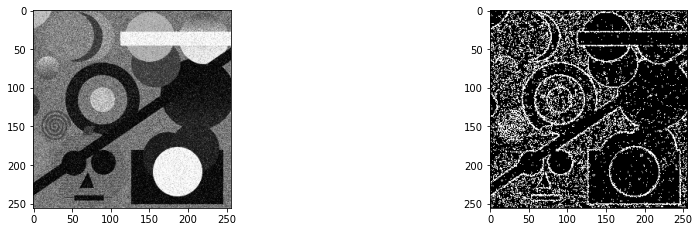

In [300]:
plt.subplot(221)
plt.imshow(color2gray(cv2.imread('circles.png')), cmap="gray")

plt.subplot(222)
plt.imshow(get_edges(color2gray(cv2.imread('circles.png')), threshold=130), cmap="gray")

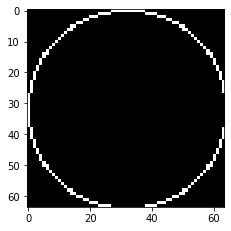

In [183]:
def create_circle_np(radius=16):
    """
    Will not use - want a nicer circle instead
    """
    xx, yy = np.mgrid[:radius*2, :radius*2]
    circle = (xx - radius) ** 2 + (yy - radius) ** 2
    return np.logical_and(circle < (radius**2 + radius), circle > (radius**2 - radius))

circle = create_circle_np()
plt.subplot(221)
plt.imshow(circle, cmap="gray", clim=(0, 1))

(32, 32)


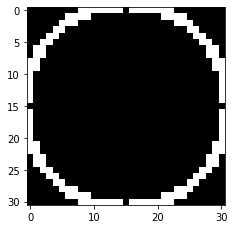

In [224]:
from skimage.draw import circle_perimeter
from skimage.draw import circle_perimeter_aa

def create_circle_sk(radius=16):
    img = np.zeros((radius*2, radius*2), dtype=np.uint8)
    rr, cc, val = circle_perimeter_aa(radius, radius, radius, shape=(radius*2, radius*2))
    img[rr, cc] = val * 255
    return img

plt.subplot(221)
sk_circle = create_circle_sk()
print(sk_circle.shape)
plt.imshow(sk_circle[1:,1:], cmap="gray", clim=(0, 1))

In [354]:
# Part B - Hough Transform - code below
import copy

CIRCLE_32 = create_circle_sk(radius=16)
CIRCLE_64 = create_circle_sk(radius=32)
CIRCLE_96 = create_circle_sk(radius=48)

map_circles = {
    16: CIRCLE_32,
    32: CIRCLE_64,
    48: CIRCLE_96
}

def mask_circle(circle, horizontal=True):
    circle = copy.deepcopy(circle)
    to_mask = int(circle.shape[0] / 6)
    if not horizontal:
        circle[0:to_mask, :] = 0
        circle[-1 * to_mask:, :] = 0
    else:
        circle[:, 0:to_mask] = 0
        circle[:, -1 * to_mask:] = 0
    return circle
    
def add_circle_to_accum(row_num: int, col_num: int, accum: np.array, radius=16, orientation=None):
    # translate normal image coordinates to padded accum coordinates
    row_num += radius
    col_num += radius
#     print(orientation)
    
    # now make the section that will add the circle
    left, right, up, down = (row_num - radius), (row_num + radius), (col_num - radius), (col_num + radius)
    if orientation is not None:
        circle_to_add = mask_circle(map_circles[radius], horizontal=orientation<0.75)
    else:
        circle_to_add = map_circles[radius]
    
    accum[int(left):int(right), int(up):int(down)] += circle_to_add
    return accum

def hough(img, radius=16, threshold=130, orientation=True):
    accum = np.zeros((img.shape[0] + radius*2, img.shape[1] + radius*2))
    print("Accum shape", accum.shape, "original shapoe", img.shape)
    edge_imgs = get_edges(img, threshold)
    orient = get_orientation(img)
    
    for row_num in tqdm(range(edge_imgs.shape[0]), leave=False):
        for col_num in range(edge_imgs.shape[1]):
            if edge_imgs[row_num, col_num]:
                if orientation:
                    cur_orient = orient[row_num, col_num]
                else:
                    cur_orient = None
                accum = add_circle_to_accum(row_num, col_num, accum, radius=radius, orientation=cur_orient)
                
    return accum, edge_imgs


Accum shape (288, 288) original shapoe (256, 256)


Accum shape (288, 288) original shapoe (256, 256)


Accum shape (320, 320) original shapoe (256, 256)


Accum shape (352, 352) original shapoe (256, 256)


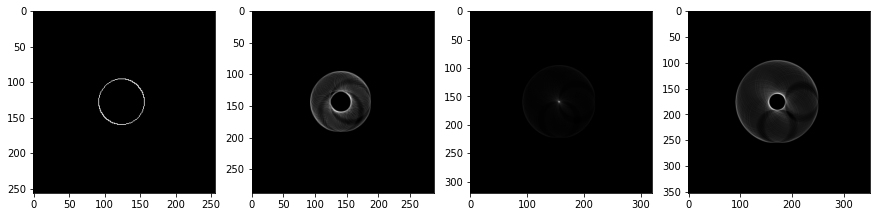

In [362]:

# Be sure to show all of the figures required in the description above
simple_circle = color2gray(cv2.imread('simplecircle.png'))
s_accum, s_circle_edges = hough(simple_circle, radius=16, orientation=False)

plt.subplot(141)
plt.imshow(s_circle_edges, cmap="gray", clim=(0, 1))

plt.subplot(142)
plt.imshow(hough(simple_circle, radius=16, orientation=False)[0], cmap="gray")

plt.subplot(143)
plt.imshow(hough(simple_circle, radius=32, orientation=False)[0], cmap="gray")

plt.subplot(144)
plt.imshow(hough(simple_circle, radius=48, orientation=False)[0], cmap="gray")

Accum shape (288, 288) original shapoe (256, 256)


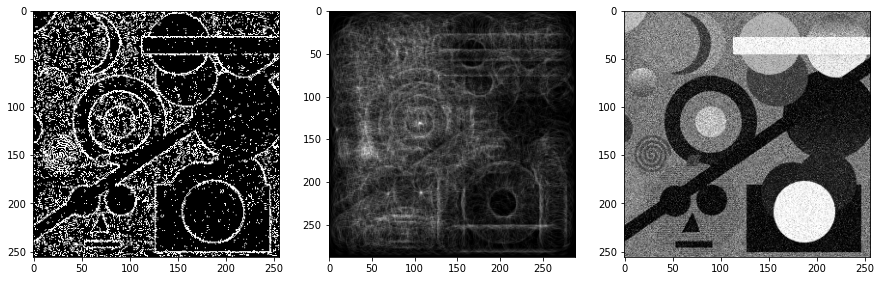

In [363]:
circles = color2gray(cv2.imread('circles.png'))
accum, circle_edges = hough(circles, radius=16)

plt.subplot(131)
plt.imshow(circle_edges, cmap="gray")

plt.subplot(132)
plt.imshow(accum,cmap="gray")

plt.subplot(133)
plt.imshow(circles, cmap="gray")

Accum shape (288, 288) original shapoe (256, 256)


Accum shape (320, 320) original shapoe (256, 256)


Accum shape (352, 352) original shapoe (256, 256)


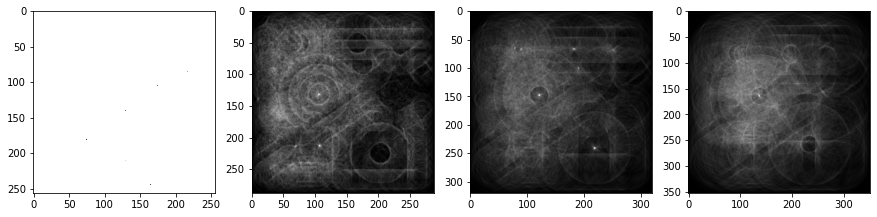

In [366]:
plt.subplot(141)
plt.imshow(circles, cmap="gray", clim=(0, 1))

plt.subplot(142)
plt.imshow(hough(circles, radius=16, orientation=False)[0], cmap="gray")

plt.subplot(143)
plt.imshow(hough(circles, radius=32, orientation=False)[0], cmap="gray")

plt.subplot(144)
plt.imshow(hough(circles, radius=48, orientation=False)[0], cmap="gray")

##### Part B: Write-up

<span style="color:red">Please describe your results here and any questions, etc. above.</span>

